In case you want to use Python and R together, you can use R magic for some cells.

activate R magic: %load_ext rpy2.ipython

Then, whenever you want to use R, you begin the cell with %%R

%%R
x <- 42
print(x)


In [1]:
#instalar/cargar paquetes básicos
if (!("sand" %in% installed.packages()[,"Package"])){
  install.packages("sand")
  library(sand)
  install_sand_packages()  
} else {
  library(sand)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘igraphdata’

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: igraphdata

Statistical Analysis of Network Data with R
Type in C2 (+ENTER) to start with Chapter 2.


ERROR: ignored

In [3]:
# Si el procedimiento anterior falla (porque el sistema o los paquetes se encuentran desactualizados) entonces recomiendo agregar los siguientes comandos a la instalación
libs = c("igraph", "igraphdata",
         "R.matlab",
         "ROCR", "ape", "car", 
         "eigenmodel", "ergm", 
         "fdrtool", "ggplot2", "huge", "kernlab", "lattice", 
         "network", "networkDynamic", "networkTomography", 
         "ngspatial", 
         # no disponibles para version de R
         # "GO.db", "GOstats", 
         # "mixer", 
         # "org.Sc.sgd.db",
         "sna", "vioplot") 
new.packages <- libs[!(libs %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“packages ‘GO.db’, ‘GOstats’, ‘mixer’, ‘org.Sc.sgd.db’ are not available (for R version 3.6.1)”also installing the dependencies ‘bitops’, ‘zip’, ‘gtools’, ‘gdata’, ‘caTools’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘DEoptimR’, ‘quadprog’, ‘slam’, ‘gplots’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolve’, ‘statnet.common’, ‘RcppEigen’, ‘KFAS’, ‘limSolve’, ‘Rglpk’, ‘batchmeans’, ‘RcppArmadillo’, ‘sm’, ‘zoo’

Warning message in install.packages(new.packages):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages(new.packages):
“installation of package ‘robustbase’ had non-zero exit status”Warning message in install.packages(new.packages):
“installation of package ‘limSolve’ had non-zero exit status”Warning message in install.packages(new.packages):
“in

In [0]:
library("R.matlab")

# Agregar datos
Los notebook en R no permiten montar Drive, por tanto hay que subir contenido

In [17]:
data_path = "/content/ar/hw1/" #directorio donde se va a trabajar

dir.create(data_path, showWarnings = FALSE)
setwd(data_path)
getwd()
list.files()

[1] "/content/ar/hw1"

[1] "Enron.zip"

In [0]:
# load data
#download.file(url="https://eva.fing.edu.uy/pluginfile.php/132941/course/section/14262/Enron.zip", destfile="Enron.zip", mode="wb")
# TODO no anda el unzip

Y = readMat("Y.mat")$Y 
employees = as.character(unlist(readMat("employees.mat")$employees))

A = rowSums (Y, na.rm = FALSE, dims = 2)
A = ifelse(A>0,1,0)


In [22]:

# resolviendolo con matrices
#############################

#B numero de aristas dirigidas
sum(A)
#3007

#C numero de aristas no dirigidas
A.und = ifelse((A + t(A)) > 0,1,0)
A.und.triang = A.und
A.und.triang[lower.tri(A.und.triang)] = 0
sum(A.und.triang)
#2097

#D arcos mutuos
A.mutual = ifelse((A + t(A)) >= 2,1,0)
A.mutual.triang = A.mutual
A.mutual.triang[lower.tri(A.mutual.triang)] = 0
sum(A.mutual.triang)
#910

#E find people not geting any email
idx.notgeting = colSums(A)==0
sum(idx.notgeting)
employees[idx.notgeting]
#3
# [1] "Vince Kaminski (j..kaminski) Manager Risk Management Head" "Mary Fischer (mary.fischer) Employee "                    
# [3] "xxx Smith (m..smith) xxx "  

#F find people not sending any email
idx.notsending = rowSums(A)==0
sum(idx.notsending)
employees[idx.notsending]
#9
# [1] "Mark Taylor (e.taylor) Manager Financial Trading Group ENA Legal"          "Gretel Smith (gretel.smith) xxx "                                         
# [3] "Vince Kaminski (j..kaminski) Manager Risk Management Head"                 "Judy Hernandez (judy.hernandez) xxx "                                     
# [5] "Mark Haedicke (mark.e.haedicke) Managing Director ENA Legal"               "Mary Fischer (mary.fischer) Employee "                                    
# [7] "Michelle Lokay (michele.lokay) Admin. Asst. Transwestern Commercial Group" "Rob Gay (rob.gay) xxx "                                                   
# [9] "Steven South (steven.south) Director West Desk Gas Trading"  


#G number of people with indegree >=30
idx.indegree30 = colSums(A)>=30
sum(idx.indegree30)
#13

#H number of people with outdegree >=30
idx.outdegree30 = rowSums(A)>=30
sum(idx.outdegree30)
#24

#I numero de triangulos dirigidos
sum(diag(A %*% A %*% A/3))
#6819


[1] 3007

[1] 2097

[1] 910

[1] 3

[1] "Vince Kaminski (j..kaminski) Manager Risk Management Head"
[2] "Mary Fischer (mary.fischer) Employee "                    
[3] "xxx Smith (m..smith) xxx "

[1] 9

[1] "Mark Taylor (e.taylor) Manager Financial Trading Group ENA Legal"         
[2] "Gretel Smith (gretel.smith) xxx "                                         
[3] "Vince Kaminski (j..kaminski) Manager Risk Management Head"                
[4] "Judy Hernandez (judy.hernandez) xxx "                                     
[5] "Mark Haedicke (mark.e.haedicke) Managing Director ENA Legal"              
[6] "Mary Fischer (mary.fischer) Employee "                                    
[7] "Michelle Lokay (michele.lokay) Admin. Asst. Transwestern Commercial Group"
[8] "Rob Gay (rob.gay) xxx "                                                   
[9] "Steven South (steven.south) Director West Desk Gas Trading"

[1] 13

[1] 24

[1] 6819

In [23]:
# resolviendolo con igraph
#############################
#http://igraph.org/r/doc/igraph.pdf
library("igraph")


g = graph.adjacency(A)

g.plus = graph.adjacency(rowSums (Y, na.rm = FALSE, dims = 2), weighted = TRUE)
V(g.plus)$id = employees

#B numero de aristas dirigidas
length(E(g))
ecount(g)
#3007

#C numero de aristas no dirigidas
g.und = as.undirected(g, mode = "collapse")
length(E(g.und))
#2097

#D arcos mutuos
g.mutual = as.undirected(g, mode = "mutual")
length(E(g.mutual))
#910

#E find people not geting any email
sum(degree(g.plus, mode = "in")==0)
V(g.plus)$id[degree(g.plus, mode = "in")==0]
#3
#"Vince Kaminski (j..kaminski) Manager Risk Management Head"                     "Mary Fischer (mary.fischer) Employee "                                 "xxx Smith (m..smith) xxx " 

#F find people not sending any email
sum(degree(g.plus, mode = "out")==0)
V(g.plus)$id[degree(g.plus, mode = "out")==0]
#9
# "Mark Taylor (e.taylor) Manager Financial Trading Group ENA Legal"         "Gretel Smith (gretel.smith) xxx " 
# "Vince Kaminski (j..kaminski) Manager Risk Management Head"                "Judy Hernandez (judy.hernandez) xxx " 
# "Mark Haedicke (mark.e.haedicke) Managing Director ENA Legal"             "Mary Fischer (mary.fischer) Employee " 
# "Michelle Lokay (michele.lokay) Admin. Asst. Transwestern Commercial Group"              "Rob Gay (rob.gay) xxx " 
# "Steven South (steven.south) Director West Desk Gas Trading" 


#G number of people with indegree >=30
sum(degree(g, mode = "in")>=30)
#13

#H number of people with outdegree >=30
sum(degree(g, mode = "out")>=30)
#24

#I numero de triangulos dirigidos
sum(count_triangles(g)) #25734 # MAL porque la funcion no considera la direccion del grafo (y de los triangulos)
# no encontre forma de calcularlo
#6819

[1] 3007

[1] 3007

[1] 2097

[1] 910

[1] 3

[1] "Vince Kaminski (j..kaminski) Manager Risk Management Head"
[2] "Mary Fischer (mary.fischer) Employee "                    
[3] "xxx Smith (m..smith) xxx "

[1] 9

[1] "Mark Taylor (e.taylor) Manager Financial Trading Group ENA Legal"         
[2] "Gretel Smith (gretel.smith) xxx "                                         
[3] "Vince Kaminski (j..kaminski) Manager Risk Management Head"                
[4] "Judy Hernandez (judy.hernandez) xxx "                                     
[5] "Mark Haedicke (mark.e.haedicke) Managing Director ENA Legal"              
[6] "Mary Fischer (mary.fischer) Employee "                                    
[7] "Michelle Lokay (michele.lokay) Admin. Asst. Transwestern Commercial Group"
[8] "Rob Gay (rob.gay) xxx "                                                   
[9] "Steven South (steven.south) Director West Desk Gas Trading"

[1] 13

[1] 24

[1] 25734

In [0]:

#grabar los grafos
write.graph(g, file="enron.g.pjk", format= "pajek")
write.graph(g.plus, file="enron.gplus.pjk", format= "pajek")

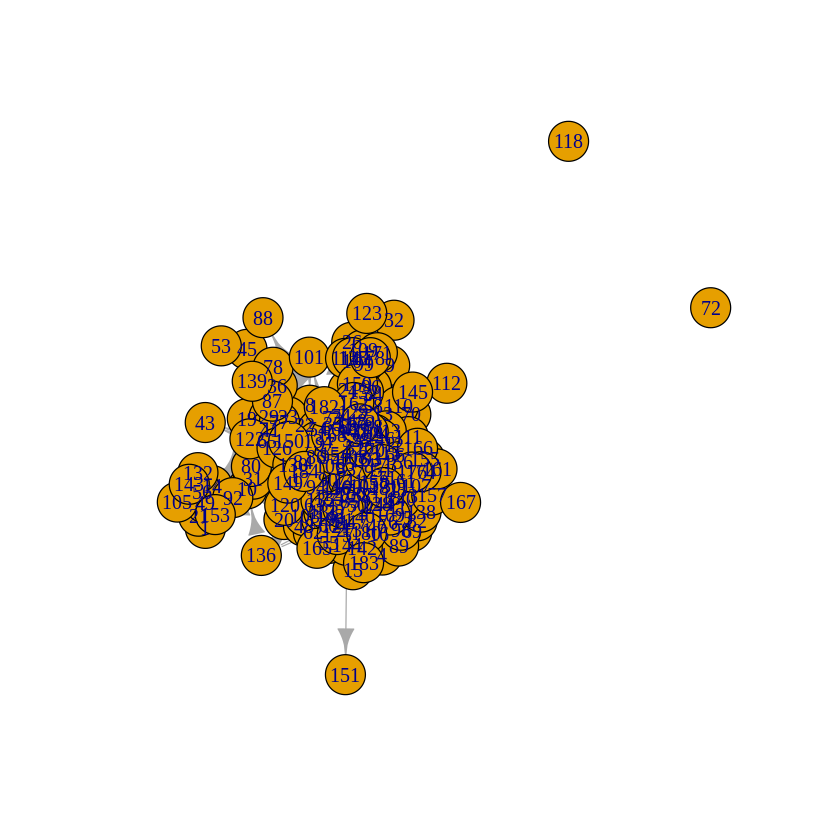

In [26]:
g_otro = read.graph(file="enron.g.pjk", format= "pajek")
plot(g_otro)

# New Section

# Todo lo viejo, como ejemplo


In [0]:
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘miniUI’, ‘webshot’, ‘manipulateWidget’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘proxy’, ‘gtools’

Loading required package: proxy

Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: gtools

Attaching package: ‘ConsRank’

The following object is masked from ‘package:base’:

    labels



In [0]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [0]:
install.packages('ggmap')
install.packages('codetools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library("ggmap")

Loading required package: ggplot2
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [0]:
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

ERROR: ignored

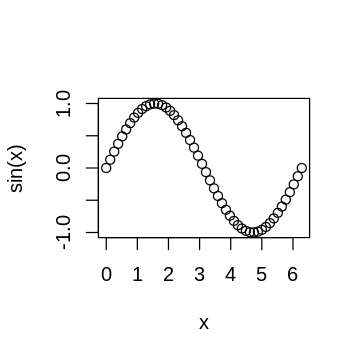

In [0]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [0]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

In [0]:
plot(fit)

In [0]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


In [0]:
rats_fit

In [0]:
plot(rats_fit)

In [0]:
## load APA data set, full version
data(APAFULL)
## Emond and Mason Branch-and-Bound algorithm.
## If the number of object is higher than 20, EMCons function may work for several minutes.
## Use either QuickCons, DECOR, FASTcons or FASTDECOR instead
CR=EMCons(APAFULL)

In [0]:
TR=tabulaterows(APAFULL)
CR2=FASTcons(TR$X,TR$Wk,maxiter=5)
CR3=QuickCons(TR$X,TR$Wk)
CR4=DECOR(TR$X,TR$Wk)
#####################################
### load sports data set
#data(sports)
### FAST algorithm
#CR=FASTcons(sports,maxiter=10)
#####################################
#######################################
### load Emond and Mason data set
#data(EMD)
### matrix X contains rankings
#X=EMD[,1:15]
### vector Wk contains frequencies
#Wk=EMD[,16]
### QUICK algorithm
#CR=QuickCons(X,Wk)
#######################################

In [0]:
data(BU)
polyplot(BU[,1:3],Wk=BU[,4])